<a href="https://colab.research.google.com/github/Aynahd/Freshman/blob/main/HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [14]:
from keras.datasets import mnist
objects=mnist
(train_image,train_lab),(test_image,test_lab)=objects.load_data()


0


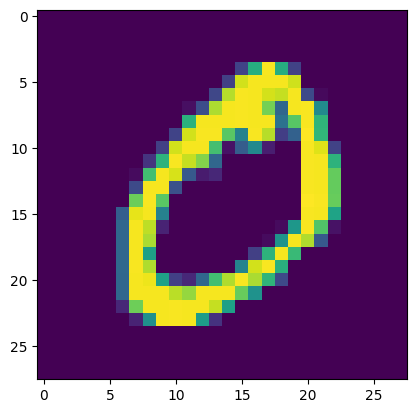

In [15]:
plt.imshow(train_image[1])
print(train_lab[1])

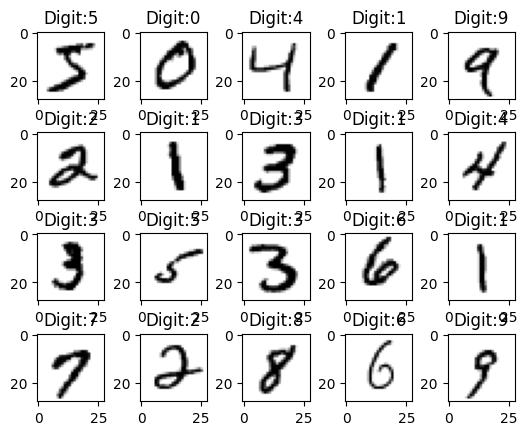

In [16]:
for i in range (20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_image[i],cmap='gray_r')
  plt.title("Digit:{}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('on')


In [17]:
print("Training images shape: ", train_image.shape)
print("Testing images shape: ", test_image.shape)
print(train_image[0])

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   

Text(0.5, 0, 'Intensity')

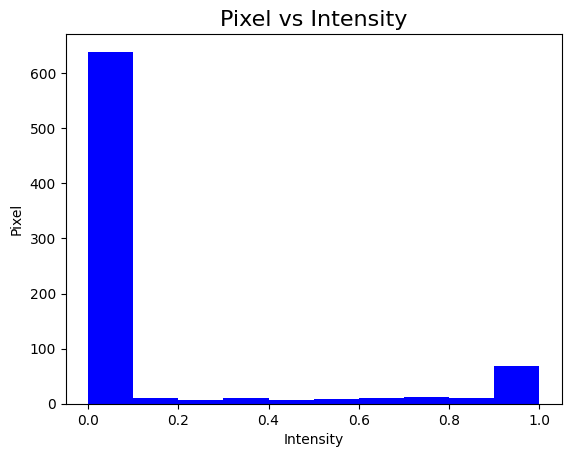

In [18]:
train_image=train_image/255.0
test_image=test_image/255.0
plt.hist(train_image[0].reshape(784),facecolor='blue')
plt.title('Pixel vs Intensity',fontsize='16')
plt.ylabel('Pixel')
plt.xlabel('Intensity')

In [19]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer=Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [20]:
#compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_image,train_lab,epochs=100)
model.save('project1')


Epoch 1/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1827 - accuracy: 0.9446
Epoch 2/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0800 - accuracy: 0.9755
Epoch 3/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0536 - accuracy: 0.9831
Epoch 4/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0412 - accuracy: 0.9869
Epoch 5/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0334 - accuracy: 0.9891
Epoch 6/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 7/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 8/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 9/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 10/100
1875/1875 [==============================]

KeyboardInterrupt: 

In [22]:
loss_and_acc=model.evaluate(test_image,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 2s - loss: 0.1138 - accuracy: 0.9821 - 2s/epoch - 8ms/step
Test Loss 0.11375224590301514
Test Accuracy 0.9821000099182129


313/313 [==============================] - 1s 4ms/step
Predicted Value:  6
Successful predictiom


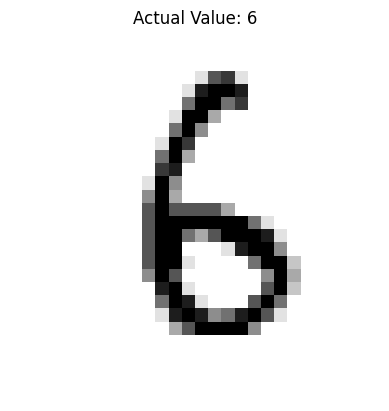

In [26]:
#check model with testing
plt.imshow(test_image[3000],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[3000]))
prediction=model.predict(test_image)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[3000]))
if(test_lab[3000]==(np.argmax(prediction[3000]))):
  print("Successful predictiom")
else:
  print("Unsuccessful. ")

In [27]:
#new file upload
from google.colab import files
uploaded = files.upload()

Saving Untitled.jpg to Untitled.jpg


In [31]:
#new image test
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

def load_image(filename):
  img = load_img(filename, grayscale='True', target_size=(28,28))
  img = img_to_array(img)
  img = img.reshape(1, 28, 28)
  img = img.astype('float32')
  img = img/255.0
  return img


In [32]:
#new file display
from IPython.display import Image
Image('Untitled.jpeg',width=250,height=250)

FileNotFoundError: No such file or directory: 'Untitled.jpeg'

FileNotFoundError: No such file or directory: 'Untitled.jpeg'

<IPython.core.display.Image object>